In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Cargo mis dos bases de datos y fusiono
database1 = "scr/data/winemag-data_first150k.csv"
df1 = pd.read_csv(database1)
database2 = "scr/data/winemag-data-130k-v2.csv"
df2 = pd.read_csv(database2)

#comparo las columnas porque quiero fusionar y luego limpiar la infomacion que no me interesa
print(df1.columns)
print(df2.columns)
columnas_comunes = df1.columns.intersection(df2.columns)
print(columnas_comunes)

#Fusiono las dos bases de datos con un left join
df_wine = pd.merge(df1, df2, how="outer" , on=list(columnas_comunes))
df_wine = df_wine.drop(columns=['taster_twitter_handle', 'title', 'taster_name'])


print(df_wine.head())


Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')
Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')
Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')
   Unnamed: 0   country                                        description  \
0           0     Italy  Aromas include tropical fruit, broom, brimston...   
1           0        US  This tremendous 100% varietal wine hails from ...   
2           1  Portugal  This is ripe and fruity, a wine that is smooth...   
3           1     Spain  Ripe aromas of fig, blackberry and cassis are ...   
4           2        US  Mac Watson honors the mem

In [4]:
#Quitar duplicados
duplicados = df_wine.duplicated().sum()
print(f"Total de filas duplicadas: {duplicados}")

#Quiero ver la cantidad de NaN por columna que tengo al fusionar
print(df_wine.isna().sum())
print(df_wine.isna().mean() * 100) 

#Voy a tranformar los valores NaN de la region 2 directamente con el valor de region 1
df_wine['region_2'] = df_wine['region_2'].fillna(df_wine['region_1'])

# Eliminar las filas que tengan NaN en la columna 'region_1' y precio
df_wine = df_wine.dropna(subset=['region_1'])
df_wine = df_wine.dropna(subset=['price'])

#Cambiaremos las designaciones que es un parametro que no me resulta del todo importante por el valor "Desconocido"
df_wine['designation'] = df_wine['designation'].fillna('Desconocido')

# Verificar si se eliminaron las filas correctamente
print(df_wine.head())

#compruebo el numero de filas, tenia 280899 y ahora 215792
numero_filas = df_wine.shape[0]
print("Número de filas en el DataFrame:", numero_filas)



Total de filas duplicadas: 0
Unnamed: 0          0
country            68
description         0
designation     83200
points              0
price           22691
province           68
region_1        46307
region_2       169436
variety             1
winery              0
dtype: int64
Unnamed: 0      0.000000
country         0.024208
description     0.000000
designation    29.619082
points          0.000000
price           8.077964
province        0.024208
region_1       16.485226
region_2       60.318975
variety         0.000356
winery          0.000000
dtype: float64
   Unnamed: 0 country                                        description  \
1           0      US  This tremendous 100% varietal wine hails from ...   
3           1   Spain  Ripe aromas of fig, blackberry and cassis are ...   
4           2      US  Mac Watson honors the memory of a wine once ma...   
5           2      US  Tart and snappy, the flavors of lime flesh and...   
6           3      US  Pineapple rind, lemon p

In [5]:
df_wine.info()
#reseteamos indice
df_wine.reset_index(drop=True, inplace=True)
print(df_wine.head())

<class 'pandas.core.frame.DataFrame'>
Index: 215792 entries, 1 to 280899
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   215792 non-null  int64  
 1   country      215792 non-null  object 
 2   description  215792 non-null  object 
 3   designation  215792 non-null  object 
 4   points       215792 non-null  int64  
 5   price        215792 non-null  float64
 6   province     215792 non-null  object 
 7   region_1     215792 non-null  object 
 8   region_2     215792 non-null  object 
 9   variety      215792 non-null  object 
 10  winery       215792 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 19.8+ MB
   Unnamed: 0 country                                        description  \
0           0      US  This tremendous 100% varietal wine hails from ...   
1           1   Spain  Ripe aromas of fig, blackberry and cassis are ...   
2           2      US  Mac Watson honors the

Ahora que tenemos todo limpio empiezo con mis diferentes propuestas de estudio!
Lo he divido por estos: 
1. Relación entre precio, puntuación y calidad-precio

Hipótesis: Los vinos con un precio más alto tienen una mayor puntuación, pero el ratio de calidad-precio puede ser más favorable en vinos de precio medio o bajo.

2. Variedades y regiones como factores diferenciadores

Hipótesis: Las variedades de uva autóctonas de regiones vinícolas prestigiosas tendrán un precio más alto debido a su rareza y reputación, pero los vinos de otras variedades locales pueden ofrecer mejor calidad a precios más bajos.

3. Qué características comunes tienen los vinos más top

Hipótesis: Los vinos más exclusivos comparten características como un proceso de vinificación meticuloso, una puntuación elevada, y el uso de variedades de uva limitadas y de alta calidad provenientes de regiones vinícolas famosas.

6. Relación entre el precio y la ubicación geográfica

Hipótesis: Los precios de los vinos varían considerablemente según la ubicación geográfica, siendo los vinos provenientes de regiones vinícolas famosas como Burdeos y Borgoña más caros que aquellos de zonas menos reconocidas, incluso si las puntuaciones son similares.


Relación entre Precio y Puntuación Promedio por País:
     country      price     points
0  Argentina  22.301745  86.287637
1  Australia  32.594350  88.109936
2     Canada  35.243304  88.877232
3     France  43.230158  88.678499
4      Italy  38.560732  88.526869
5      Spain  27.568353  86.928489
6         US  35.064039  88.172995


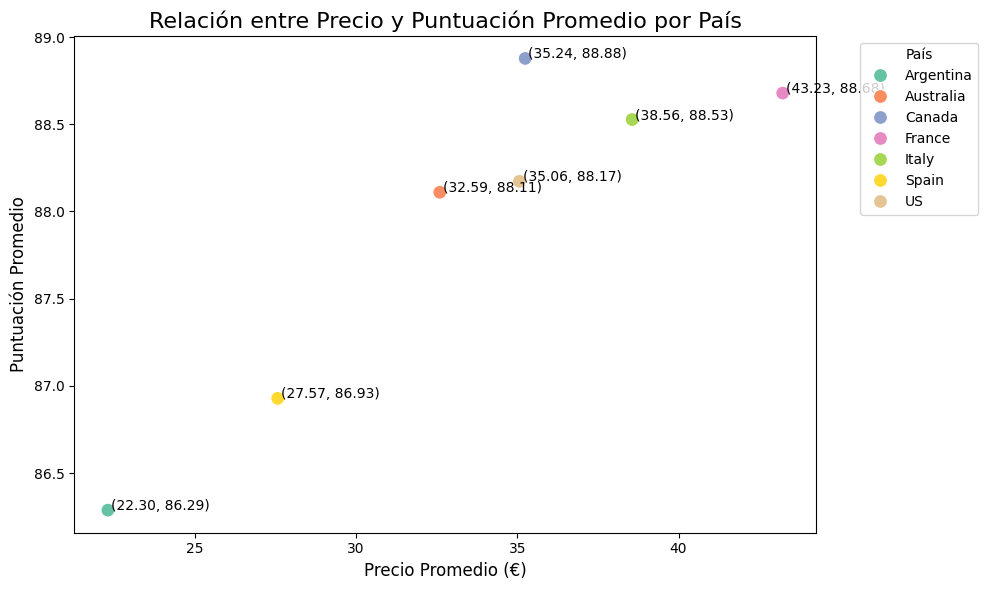

In [6]:
# Agrupamos por país y calculamos precio y puntuación promedio
tabla_precios_puntuaciones = df_wine.groupby('country').agg({'price': 'mean', 'points': 'mean'}).reset_index()

# Valores
print("Relación entre Precio y Puntuación Promedio por País:")
print(tabla_precios_puntuaciones)

# Gráfico de dispersión c
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tabla_precios_puntuaciones, x='price', y='points', hue='country', palette='Set2', s=100)

# Añadimos los valores dentro de los puntos
for i in range(tabla_precios_puntuaciones.shape[0]):
    plt.text(tabla_precios_puntuaciones['price'][i] + 0.1, tabla_precios_puntuaciones['points'][i], 
             f'({tabla_precios_puntuaciones["price"][i]:.2f}, {tabla_precios_puntuaciones["points"][i]:.2f})', 
             color='black', fontsize=10)

# Títulos y etiquetas
plt.title('Relación entre Precio y Puntuación Promedio por País', fontsize=16)
plt.xlabel('Precio Promedio (€)', fontsize=12)
plt.ylabel('Puntuación Promedio', fontsize=12)

# Leyenda
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()




Relación Calidad-Precio Promedio por País:
     country  calidad_precio
0  Argentina        5.613013
5      Spain        5.127892
1  Australia        4.439065
3     France        3.791768
4      Italy        3.607732
6         US        3.484772
2     Canada        3.307697


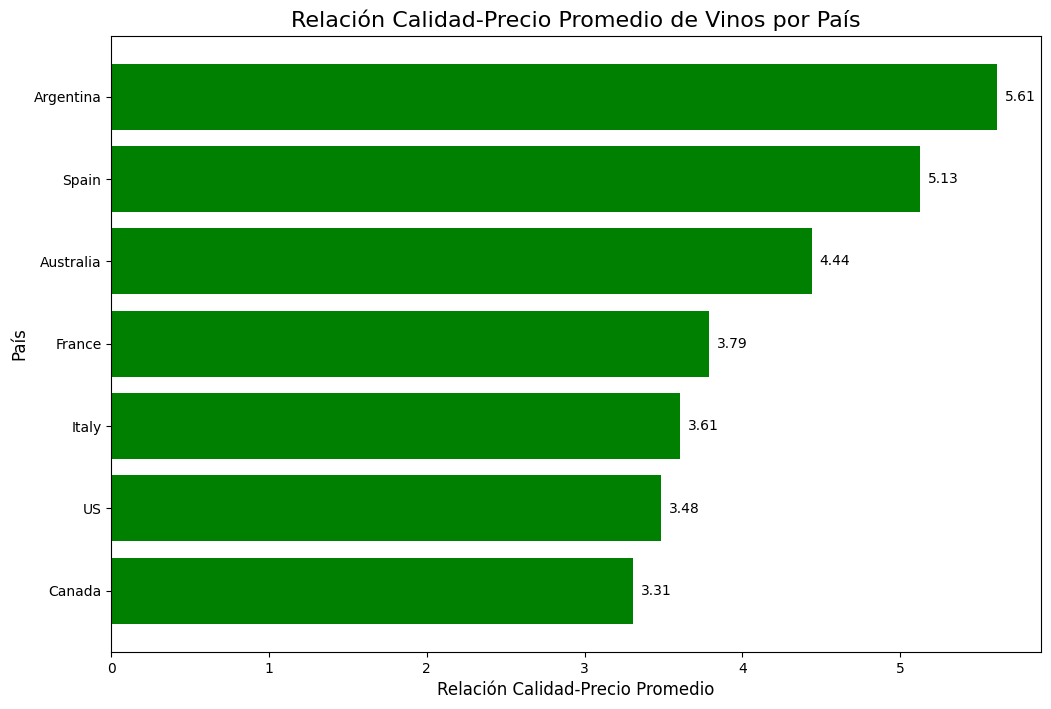

In [35]:

df_wine['calidad_precio'] = df_wine['points'] / df_wine['price']

calidad_precio_promedio_por_pais = df_wine.groupby('country')['calidad_precio'].mean().reset_index()

calidad_precio_promedio_por_pais = calidad_precio_promedio_por_pais.sort_values(by='calidad_precio', ascending=False)

print("Relación Calidad-Precio Promedio por País:")
print(calidad_precio_promedio_por_pais)

plt.figure(figsize=(12, 8))
bars = plt.barh(calidad_precio_promedio_por_pais['country'], 
                calidad_precio_promedio_por_pais['calidad_precio'], color='green')

plt.xlabel('Relación Calidad-Precio Promedio', fontsize=12)
plt.ylabel('País', fontsize=12)
plt.title('Relación Calidad-Precio Promedio de Vinos por País', fontsize=16)
plt.gca().invert_yaxis() 

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.05, bar.get_y() + bar.get_height() / 2, f'{width:.2f}', 
             va='center', fontsize=10)

plt.show()



Top 5 Variedades Más Caras en Argentina:
      country          variety       price     points
28  Argentina  Malbec-Cabernet  113.333333  91.666667
44  Argentina         Nebbiolo   63.333333  88.833333
65  Argentina   Syrah-Viognier   62.500000  91.500000
72  Argentina        Trousseau   60.000000  88.000000
47  Argentina    Petite Verdot   59.000000  84.200000

Top 5 Variedades Más Caras en Australia:
       country          variety       price     points
111  Australia         Muscadel  190.857143  94.142857
87   Australia  Cabernet-Shiraz  150.000000  96.000000
112  Australia       Muscadelle  139.714286  93.428571
149  Australia            Syrah  104.465517  91.862069
113  Australia           Muscat   87.720930  92.790698

Top 5 Variedades Más Caras en Canada:
    country             variety      price     points
192  Canada         Vidal Blanc  58.300000  88.633333
166  Canada  Cabernet Sauvignon  53.000000  89.600000
177  Canada              Merlot  50.052632  88.526316
168  Ca

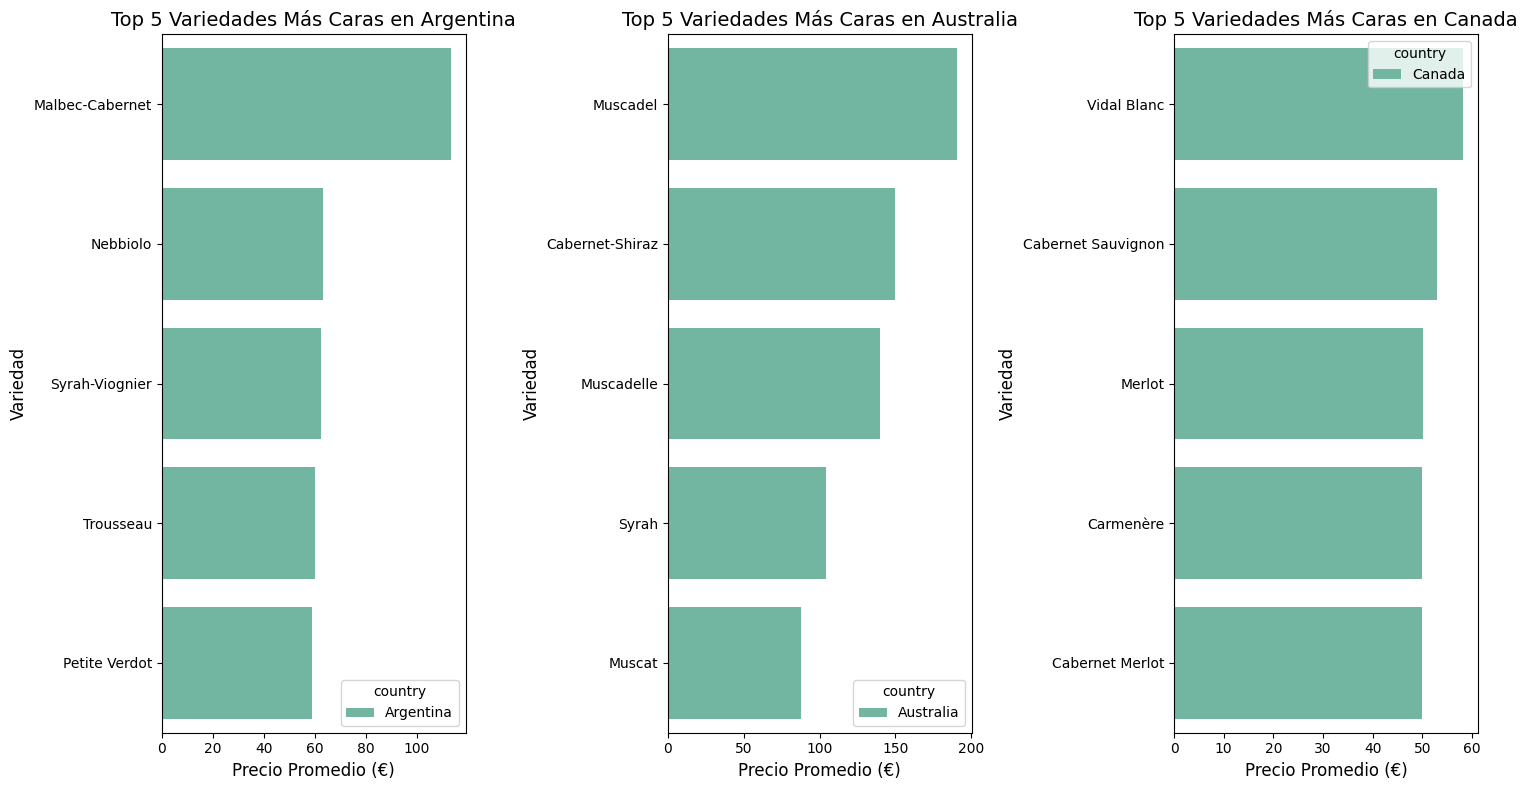

In [36]:

tabla_precio_puntuacion_variedad_pais = df_wine.groupby(['country', 'variety']).agg({'price': 'mean', 'points': 'mean'}).reset_index()

paises_parte1 = ['Argentina', 'Australia', 'Canada']

for pais in paises_parte1:
    datos_pais = tabla_precio_puntuacion_variedad_pais[tabla_precio_puntuacion_variedad_pais['country'] == pais]
    
    top_5_variedades_pais = datos_pais.sort_values(by='price', ascending=False).head(5)
    
    print(f"\nTop 5 Variedades Más Caras en {pais}:")
    print(top_5_variedades_pais[['country', 'variety', 'price', 'points']])

tabla_precio_puntuacion_variedad_pais = df_wine.groupby(['country', 'variety']).agg({'price': 'mean', 'points': 'mean'}).reset_index()

paises_parte1 = ['Argentina', 'Australia', 'Canada']

fig, axes = plt.subplots(1, 3, figsize=(15, 8))

for i, pais in enumerate(paises_parte1):
    datos_pais = tabla_precio_puntuacion_variedad_pais[tabla_precio_puntuacion_variedad_pais['country'] == pais]
    
    top_5_variedades_pais = datos_pais.sort_values(by='price', ascending=False).head(5)
    
    sns.barplot(data=top_5_variedades_pais, x='price', y='variety', hue='country', ax=axes[i], palette='Set2')
    
    axes[i].set_title(f'Top 5 Variedades Más Caras en {pais}', fontsize=14)
    axes[i].set_xlabel('Precio Promedio (€)', fontsize=12)
    axes[i].set_ylabel('Variedad', fontsize=12)

plt.tight_layout()
plt.show()





Top 5 Variedades Más Caras en France:
    country          variety      price     points
217  France  Champagne Blend  81.192547  90.076605
216  France   Carignan-Syrah  80.000000  92.000000
291  France       Pinot Noir  79.284895  89.575207
323  France            Syrah  74.100352  89.829225
255  France         Marsanne  70.988764  90.292135

Top 5 Variedades Más Caras en Italy:
    country         variety       price    points
411   Italy        Grenache  230.000000  90.00000
397   Italy        Francisa  160.000000  91.00000
437   Italy          Merlot   88.865672  89.99005
363   Italy  Cabernet Franc   85.226667  92.16000
540   Italy        Vitovska   85.000000  90.50000

Top 5 Variedades Más Caras en Spain:
    country                 variety       price     points
559   Spain                Carignan  177.352941  92.823529
661   Spain  Touriga Nacional Blend  144.000000  90.000000
599   Spain                 Mazuelo   85.000000  87.833333
550   Spain          Cabernet Blend   79.25

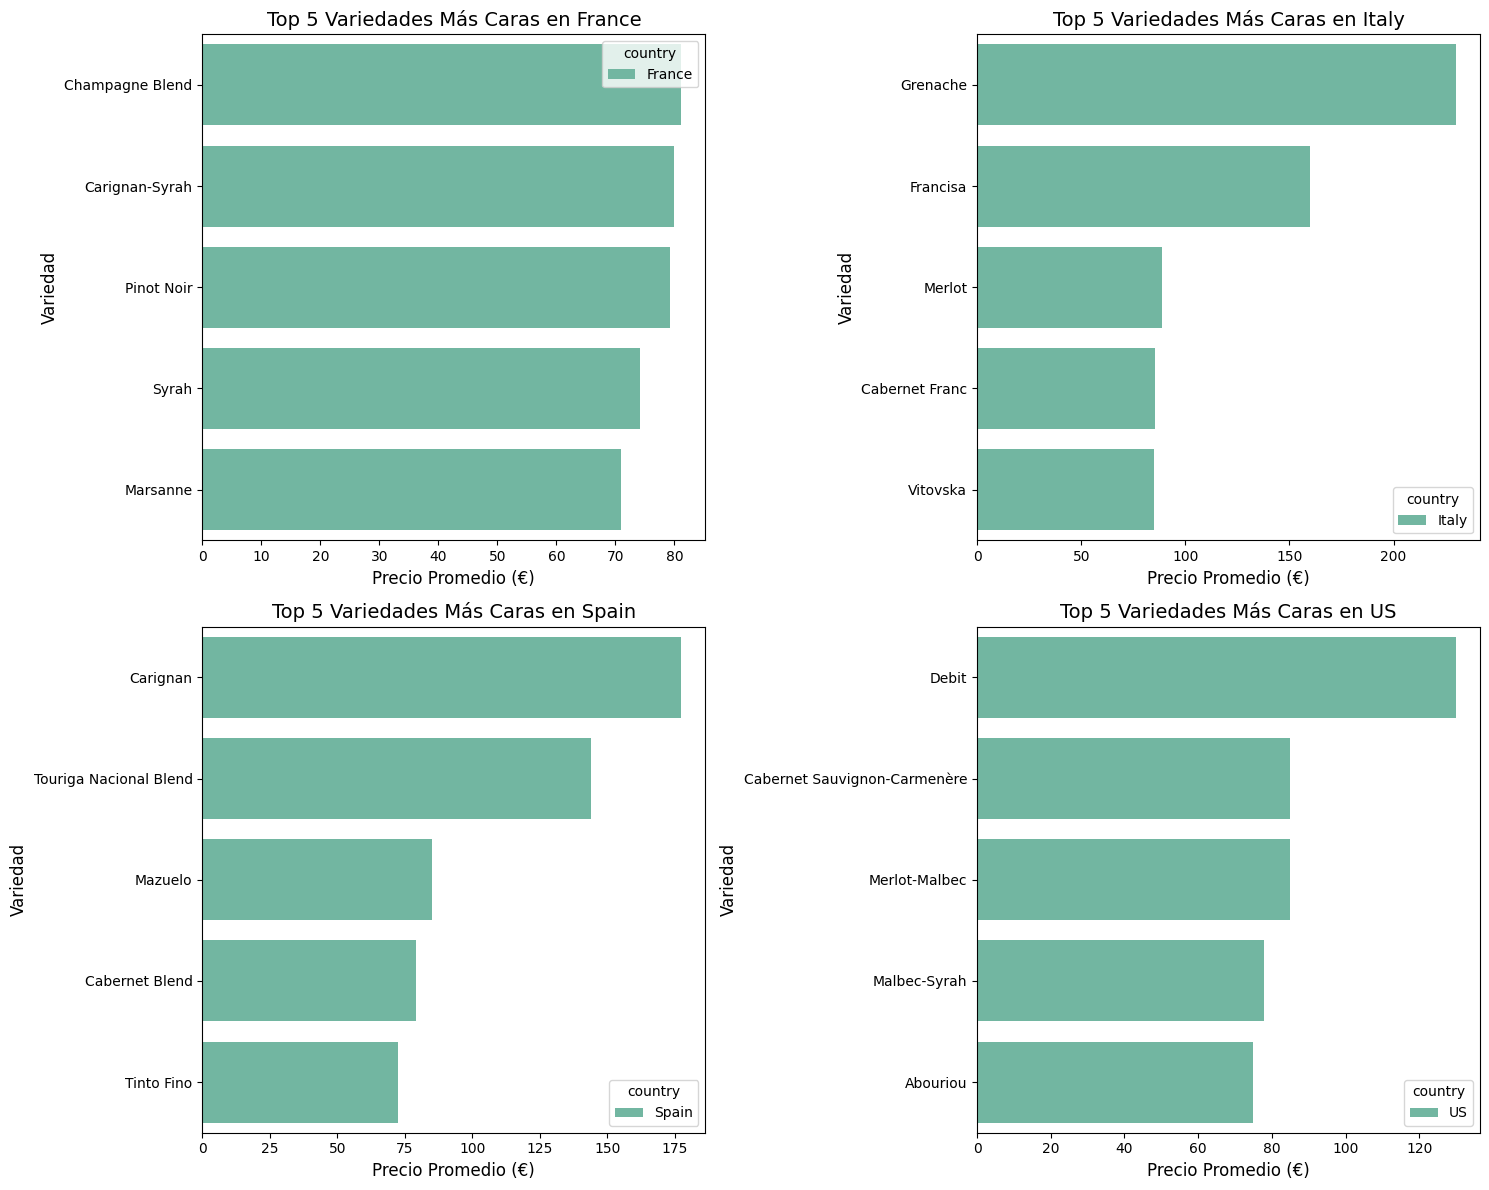

In [37]:
tabla_precio_puntuacion_variedad_pais = df_wine.groupby(['country', 'variety']).agg({'price': 'mean', 'points': 'mean'}).reset_index()

paises_parte1 = ['France', 'Italy', 'Spain', 'US']

for pais in paises_parte1:
    datos_pais = tabla_precio_puntuacion_variedad_pais[tabla_precio_puntuacion_variedad_pais['country'] == pais]
    
    top_5_variedades_pais = datos_pais.sort_values(by='price', ascending=False).head(5)
    
    print(f"\nTop 5 Variedades Más Caras en {pais}:")
    print(top_5_variedades_pais[['country', 'variety', 'price', 'points']])

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

axes = axes.flatten()

for i, pais in enumerate(paises_parte1):
    datos_pais = tabla_precio_puntuacion_variedad_pais[tabla_precio_puntuacion_variedad_pais['country'] == pais]
    top_5_variedades_pais = datos_pais.sort_values(by='price', ascending=False).head(5)
    
    sns.barplot(data=top_5_variedades_pais, x='price', y='variety', hue='country', ax=axes[i], palette='Set2')
    
    axes[i].set_title(f'Top 5 Variedades Más Caras en {pais}', fontsize=14)
    axes[i].set_xlabel('Precio Promedio (€)', fontsize=12)
    axes[i].set_ylabel('Variedad', fontsize=12)

plt.tight_layout()
plt.show()



C:\Users\mario\AppData\Local\Temp\ipykernel_10484\2910146288.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_10_caros = df_wine.groupby('country').apply(lambda x: x.nlargest(50, 'points')).reset_index(drop=True)


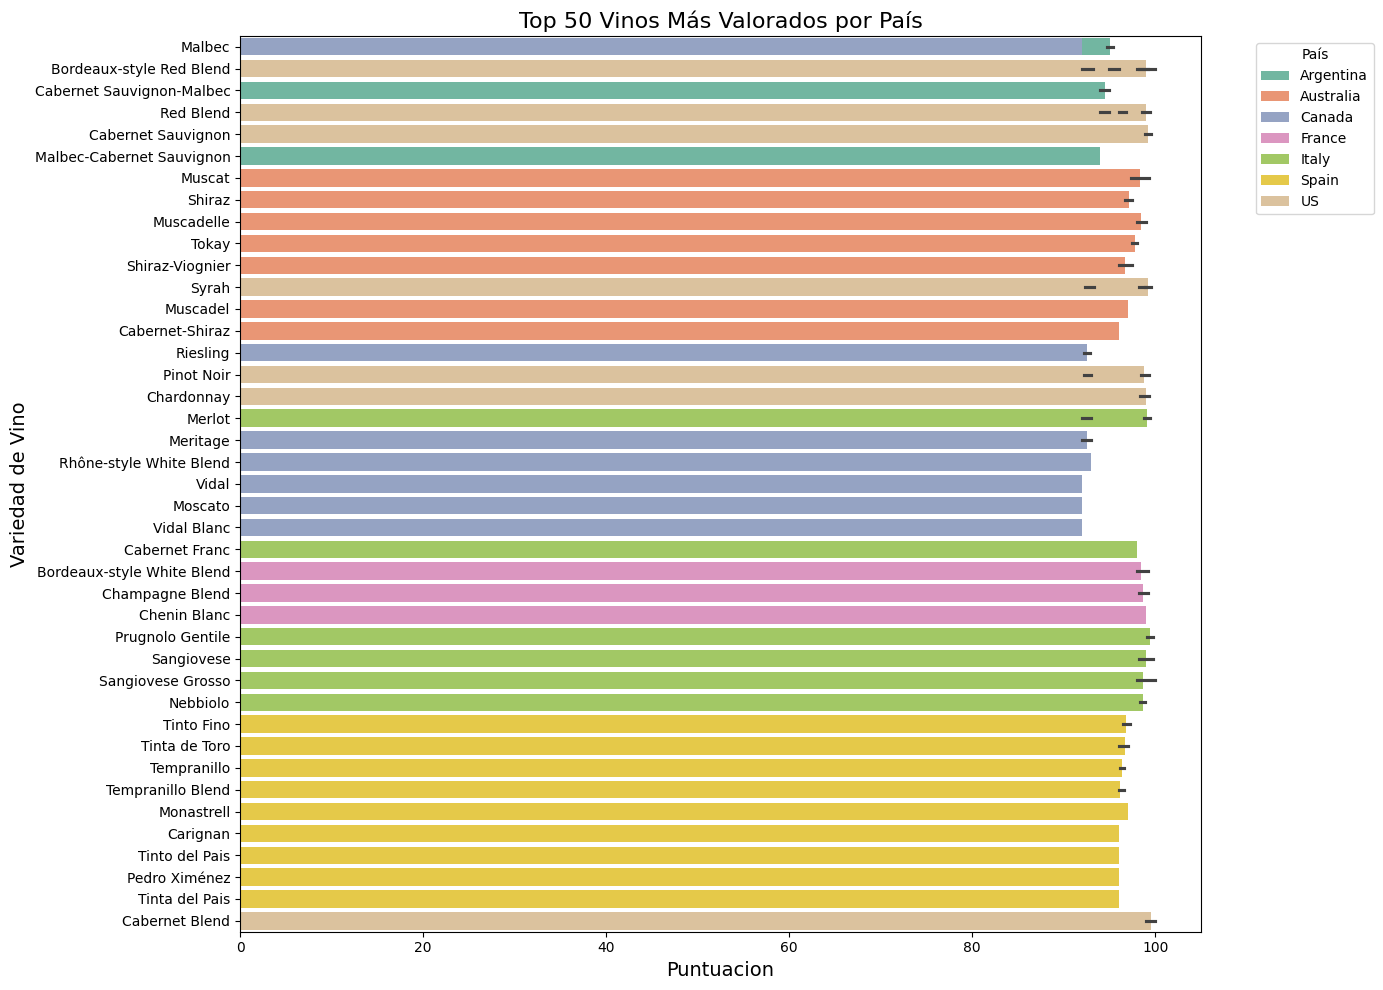

In [7]:
top_10_caros = df_wine.groupby('country').apply(lambda x: x.nlargest(50, 'points')).reset_index(drop=True)

plt.figure(figsize=(14, 10))
sns.barplot(data=top_10_caros, x='points', y='variety', hue='country', dodge=False, palette='Set2')

plt.title('Top 50 Vinos Más Valorados por País', fontsize=16)
plt.xlabel('Puntuacion', fontsize=14)
plt.ylabel('Variedad de Vino', fontsize=14)
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


C:\Users\mario\AppData\Local\Temp\ipykernel_20624\3860072687.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_50_peores_valorados = df_wine.groupby('country').apply(lambda x: x.nsmallest(50, 'points')).reset_index(drop=True)


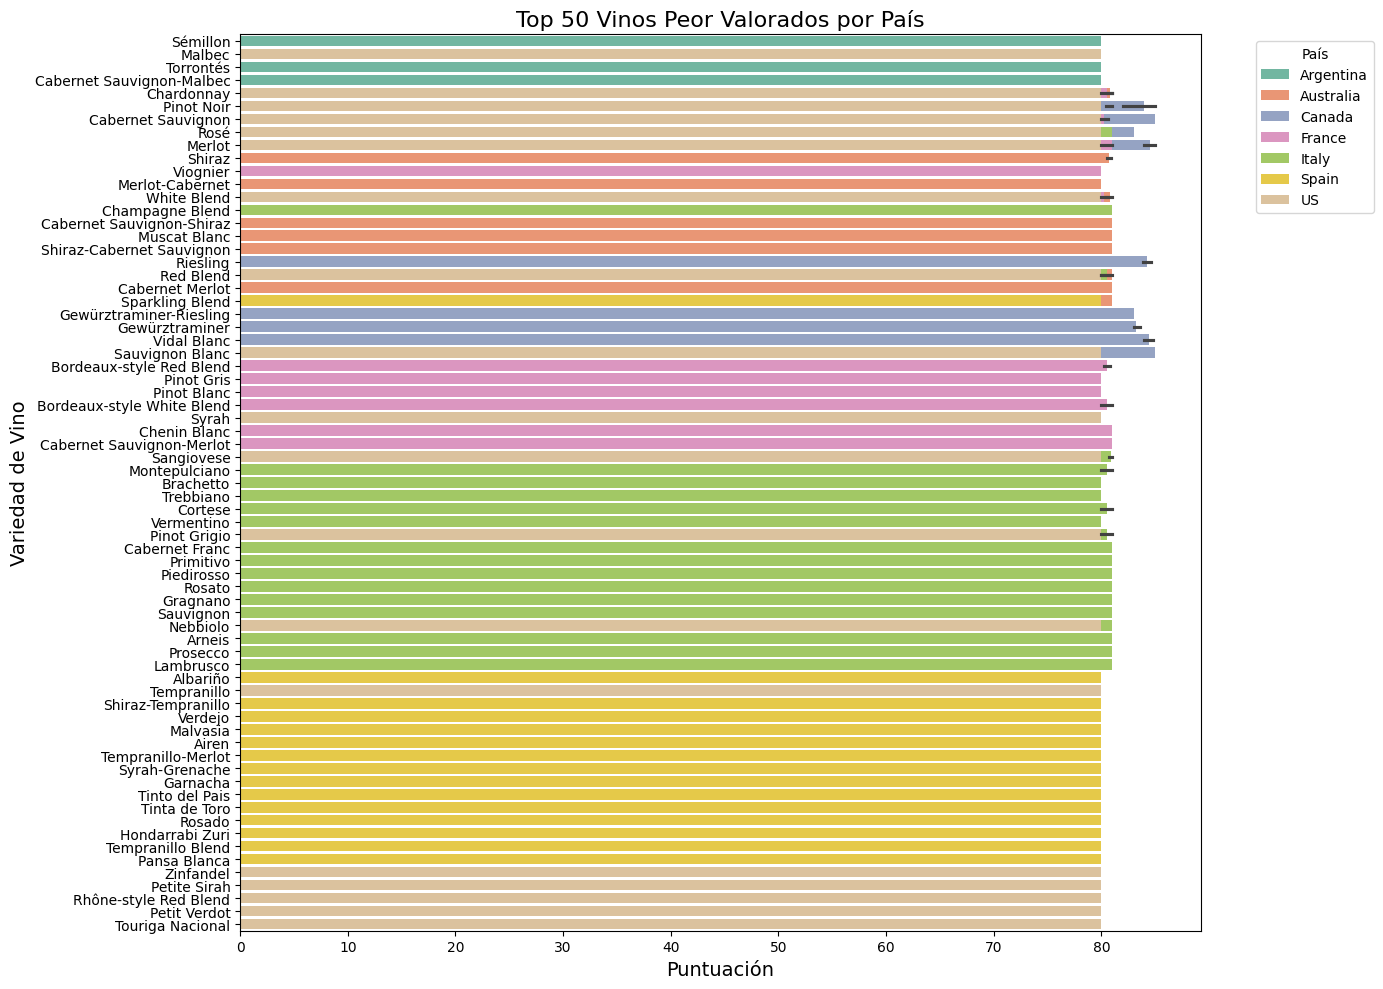

In [39]:
top_50_peores_valorados = df_wine.groupby('country').apply(lambda x: x.nsmallest(50, 'points')).reset_index(drop=True)

plt.figure(figsize=(14, 10))
sns.barplot(data=top_50_peores_valorados, x='points', y='variety', hue='country', dodge=False, palette='Set2')

plt.title('Top 50 Vinos Peor Valorados por País', fontsize=16)
plt.xlabel('Puntuación', fontsize=14)
plt.ylabel('Variedad de Vino', fontsize=14)
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()
